# Project: Investigate a Medical Appointment Dataset
___

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

___


<a id='intro'></a>
## Introduction

> 110,526 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

> What if that possible to predict someone to no-show an appointment?

In [1]:
# Import pandas and matplotlib
import pandas as pd
%matplotlib inline

___
<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load My data and print out a first 5 rows
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**It seems that "PatientId" column isn't in the right format.**
**Also "No_show" column may be misunderstood**

Let's check volume (shape) of the data :

In [3]:
df.shape 

(110527, 14)

**Let's check type of attributes and see if we will change some of it:**

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**"PatientId" is float !**

Check type of 'No-show' column

In [5]:
type(df['No-show'][0]) 

str

Check type of 'ScheduledDay' column

In [6]:
type(df['ScheduledDay'][0])

str

Check type of 'AppointmentDay' column

In [7]:
type(df['AppointmentDay'][0])

str

#### Check Null columns

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null values

#### Check Duplicated columns

In [9]:
sum(df.duplicated())

0

No Duplicates

#### Check Unique values and the range of the values in columns

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [12]:
df['AppointmentDay'].unique() 

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

**The time in Appointment Day is dublicated and it is not important !**

In [13]:
df['Handcap'].unique() 

array([0, 1, 2, 3, 4])

**"Handcap" should be true or false !**

Let's examine the structure of the entire data. ant take summary statistics for the numerical features.

In [14]:
df.loc[:,"Age":].describe() # not include ids

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


1- **There's negative values in "Age" column.** <br>
2- The mean of Age is 37 which is strange ! <br>
3- Handcap has values bigger than 1 !

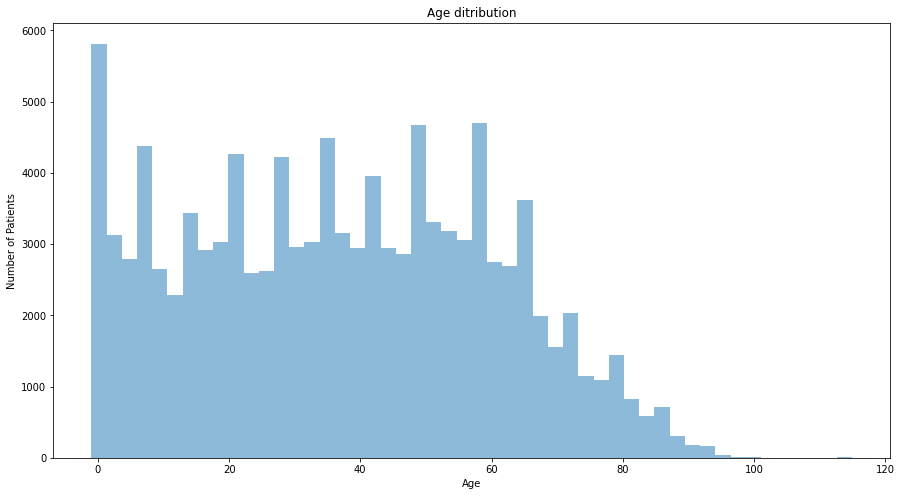

In [15]:
AgePlot = df.Age.plot(kind="hist",figsize=(15,8),bins=50,alpha=0.5);
AgePlot.set_xlabel('Age');
AgePlot.set_ylabel('Number of Patients');
AgePlot.set_title('Age ditribution');

**There is some ages fewer than zero !**

In [16]:
print(sorted(df["Age"].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


**Negative Value in "Age" Column!**

***

## **Problems in the Dataset :**

##### 1- "PatientId" column is float
##### 2- "No-show" column may be misunderstood
##### 3- "Age" column has negative value
##### 4- "Handcap" should be true or false
##### 5- The time in Appointment Day is not important

***

### Data Cleaning

#### 1- Change Type of pitient id from float to int

Change "PatientId" from float to int.

In [17]:
# Change "PatientId" from float to int
df['PatientId'] = df['PatientId'].astype(int) 

#### 2- Change name of "No-show" to "show" and change values

Display unique values for "No-show" column.

In [18]:
# Display unique values for "No-show" col
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

Rename "No-show" to "show" and reverse values

In [19]:
# Rename "No-show" to "show"
df.rename(columns={'No-show': 'Show'}, inplace=True)
df = df.replace({'Show': {'Yes': 0, 'No': 1}}) #reverse values

In [20]:
# Display unique values for "Show" col
df["Show"].unique()

array([1, 0])

**Good !**

#### 3- Remove negative values and zeros from Age columns

In [21]:
df = df[df['Age'] >= 0] # take only rows has age above or equal 0
sum(df['Age'] < 0) # Check

0

#### 4- "Handcap" must be true or false

In [22]:
# count of every value in Handcap
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [23]:
df = df.replace({'Handcap': {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}}) # replace values bigger than zero by 1

In [24]:
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

**Good !**

#### 5- The time in Appointment Day is not important

In [25]:
# clear time in Appointment Day
df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x: x[0:10])


In [26]:
df["AppointmentDay"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

#### 6- Split ScheduledDay to ScheduledDate and ScheduledTime

In [27]:
df["ScheduledDay"].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [28]:
# Split 2 columns
df["ScheduledDate"] = df["ScheduledDay"].apply(lambda x: x[:10])
df["ScheduledTime"] = df["ScheduledDay"].apply(lambda x: x[11:-1])

In [29]:
# Drop the original column
df.drop(columns=["ScheduledDay"], inplace=True)

### Last veiw before Exploration :

In [30]:
df.head() 

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


**Good !**

#### Save version of cleaned Data

In [31]:
# save Dataset after cleaning
df.to_csv('df_edited.csv', index=False)

#### Before exploration, split data to Presence and absence

In [32]:
df_S = df.query("Show == 1")
df_N = df.query("Show == 0")
df_S.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


<a id='eda'></a>
## Exploratory Data Analysis

Function to graph bar to avoid repetitive code:

In [33]:
def graphBar(df,clr):
        df.value_counts().plot(kind="bar",color=clr,alpha=0.3);

### Question 1 : What factors are important in order to predict if a patient will show up for their scheduled appointment?

**This question is the main question that we want to answer and that the data has been collected to answer, our answer to this question and the analysis of the data we have will help us increase the percentage of patients who adhere to their medical appointments.**

___

First check on histogram and distribution and ranges of columns

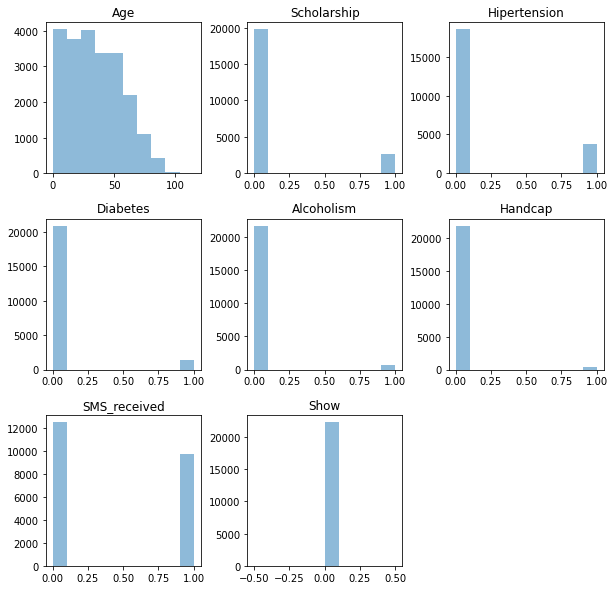

In [34]:
df_N.iloc[:,2:-2].hist(figsize=(10,10),grid=False,alpha=0.5);

**Plot Age distribution to know its range and outliers**

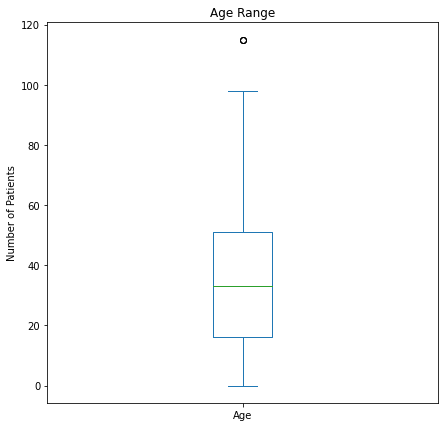

In [35]:
# plot Age to know its range
BoxAge = df_N["Age"].plot(kind="box",figsize=(7,7));
BoxAge.set_ylabel('Number of Patients');
BoxAge.set_title('Age Range');

**There is some outliers, let's check it !**

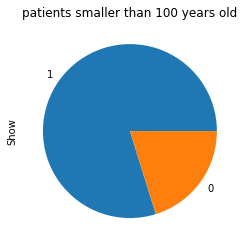

In [36]:
# Check outliers impact
pieAgeOld = df.query("Age < 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("patients smaller than 100 years old");

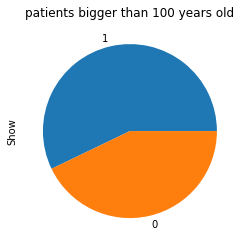

In [37]:
# Find outliers impact
pieAgeOld = df.query("Age > 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("patients bigger than 100 years old");

<h4>Older people are less likely to show up for appointments, maybe because they're dead?</h4>

Let's see if the ScheduledDate has impact on attend or not.

,ScheduledDate
count,110526
unique,111
top,2016-05-03
freq,4238


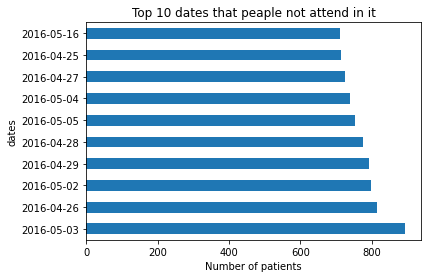

In [38]:
# plot top 10 dates that peaple not attend in it
datesBar = df_N["ScheduledDate"].value_counts()[0:10].plot.barh();
datesBar.set_title("Top 10 dates that peaple not attend in it");
datesBar.set_xlabel("Number of patients");
datesBar.set_ylabel("dates");
pd.DataFrame(df['ScheduledDate'].describe())

**Split months from date to make some statistics on it.**

In [39]:
# extract month from ScheduledDate for attend persons
df_month_S = df_S["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))
# extract month from ScheduledDate for abscent persons
df_month_N = df_N["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))

**Check the attendance and abscence in months**

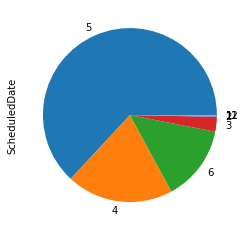

In [40]:
df_month_S.value_counts().plot.pie();

May is the most month has attendance

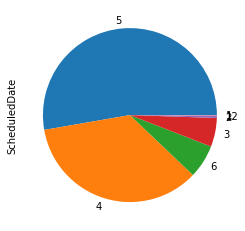

In [41]:
df_month_N.value_counts().plot.pie();

<h4>In April, people miss their appointments more than usual</h4>

#### Check if there is relation between Scheduled Date and Appointment Day

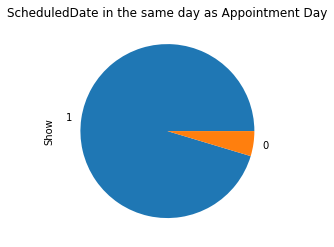

In [42]:
df_fastApp_e = df[df["ScheduledDate"] == df["AppointmentDay"]]
piePlot = df_fastApp_e.Show.value_counts().plot(kind="pie");
piePlot.set_title("ScheduledDate in the same day as Appointment Day");

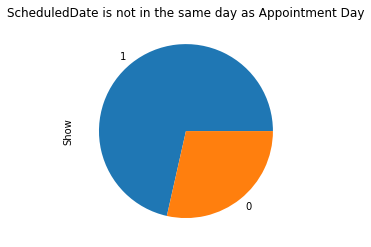

In [43]:
df_fastApp_n = df[df["ScheduledDate"] != df["AppointmentDay"]]
piePlot = df_fastApp_n.Show.value_counts().plot(kind="pie");
piePlot.set_title("ScheduledDate is not in the same day as Appointment Day");

<h4>Booking the appointment on the same day has a good effect on attending the appointment.</h4>

___

### Question 2 : What factors are important to know what make peaple make an appointment
**It is important to know the factors affecting booking appointments, what causes people to book appointments and what factors hinder them from doing so.**

___

Gender
F    71839
M    38687
Name: PatientId, dtype: int64

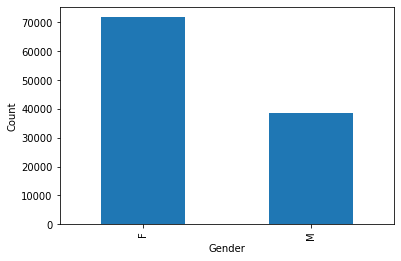

In [44]:
df.groupby(["Gender"])["PatientId"].count().plot(kind="bar").set_ylabel('Count')
df.groupby(["Gender"])["PatientId"].count()

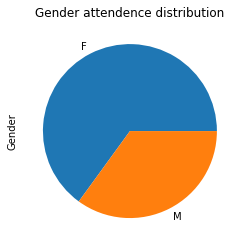

In [45]:
# See who is most attend
Gen = df['Gender'].value_counts().plot(kind="pie");
Gen.set_title("Gender attendence distribution");

#### Females books more appointments than males.

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


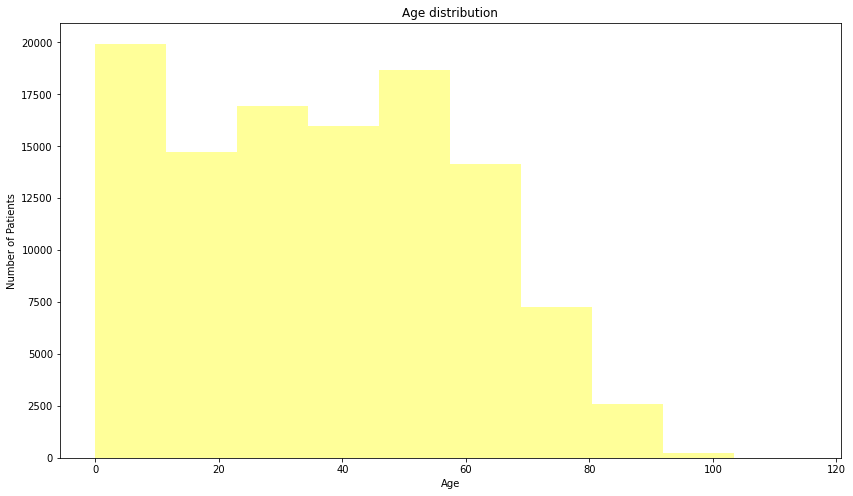

In [46]:
# plot Age histogram
his = df['Age'].plot(kind="hist",color="yellow",alpha=0.4,figsize=(14,8));
his.set_ylabel('Number of Patients');
his.set_xlabel('Age');
his.set_title('Age distribution');
pd.DataFrame(df['Age'].describe())

**The distribution is skewed to left,which means there is many childs who have appointments.**

<h4>Young people are the most booked for appointments</h4>

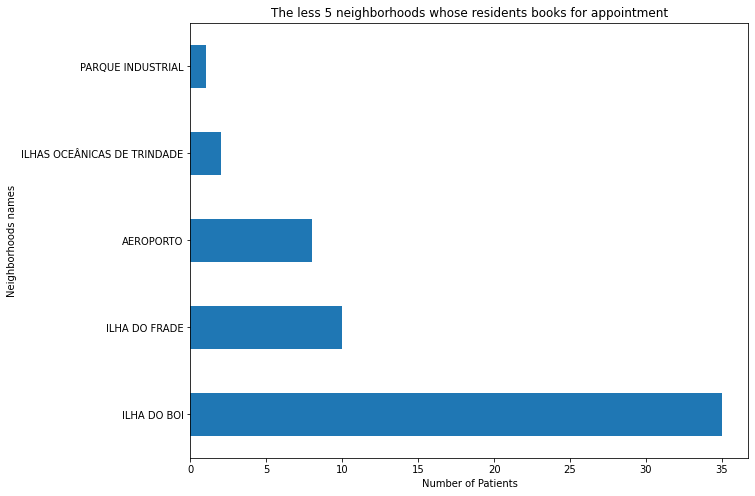

In [47]:
neigh = df.Neighbourhood.value_counts()[-5:].plot.barh(figsize=(10,8));
neigh.set_ylabel('Neighborhoods names');
neigh.set_xlabel('Number of Patients');
neigh.set_title('The less 5 neighborhoods whose residents books for appointment');

In [48]:
print(f"The less 5 neighborhoods whose residents books for appointment: \n")
for word in df.Neighbourhood.unique()[-5:] :
    print(f"{word}")

The less 5 neighborhoods whose residents books for appointment: 

FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PARQUE INDUSTRIAL


___

<a id='conclusions'></a>
## Conclusions

### Analysis Shortcoming & Data Limitations

> **1. There are many columns that has false and true value, that make the analysis is more harder and prevent many plots that can make.**

> **2- The form of date columns make the data hard to analysis it and plot it.**

___

### Conclusions

> ### 1 - Older people are less likely to show up for appointments, maybe because they're dead? 

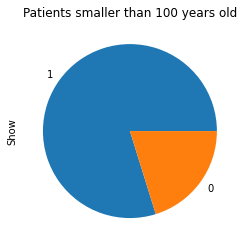

In [49]:
pieAgeOld = df.query("Age < 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("Patients smaller than 100 years old");

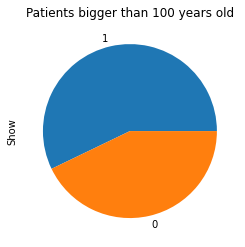

In [50]:
pieAgeOld = df.query("Age > 100").Show.value_counts().plot(kind="pie");
pieAgeOld.set_title("Patients bigger than 100 years old");

___

> ### 2 - people miss their appointments more than usual in April

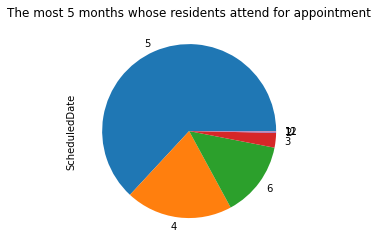

In [51]:
plotMon = df_month_S.value_counts().plot.pie();
plotMon.set_title('The most 5 months whose residents attend for appointment');

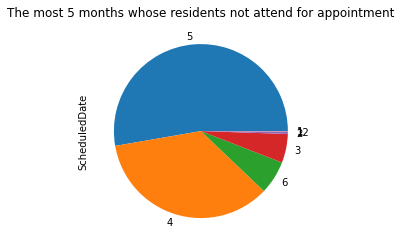

In [52]:
plotMon = df_month_N.value_counts().plot.pie();
plotMon.set_title('The most 5 months whose residents not attend for appointment');

___

> ### 3 - Reserving the appointment on the same day has a good effect on attending the appointment

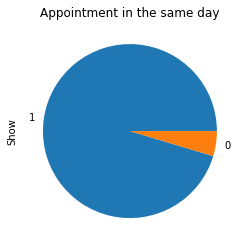

In [53]:
plotfastApp = df_fastApp_e.Show.value_counts().plot(kind="pie");
plotfastApp.set_title('Appointment in the same day');

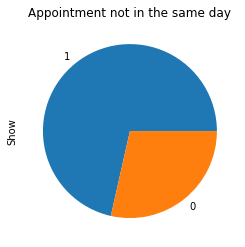

In [54]:
plotslowApp = df_fastApp_n.Show.value_counts().plot(kind="pie");
plotslowApp.set_title('Appointment not in the same day');

___

> ### 4 - Females books more appointments than males.

,Gender
count,110526
unique,2
top,F
freq,71839


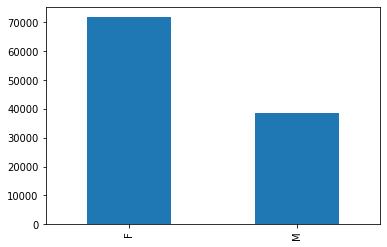

In [55]:
df['Gender'].value_counts().plot(kind="bar");
his.set_ylabel('Number of Patients');
his.set_xlabel('Gender');
his.set_title('Gender distribution');
pd.DataFrame(df['Gender'].describe())

___

> ### 5- Young people are the most booked for appointments

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


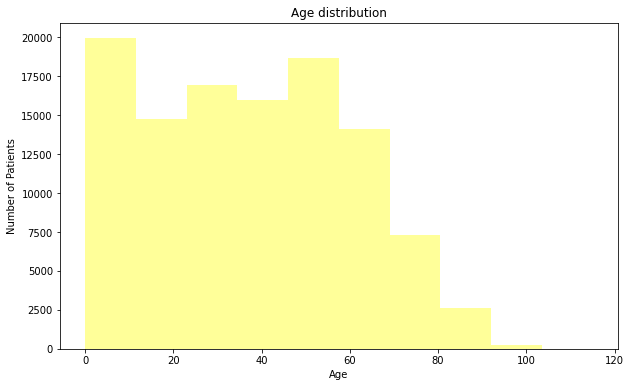

In [56]:
his = df['Age'].plot(kind="hist",color="yellow",alpha=0.4,figsize=(10,6));
his.set_ylabel('Number of Patients');
his.set_xlabel('Age');
his.set_title('Age distribution');
pd.DataFrame(df['Age'].describe())

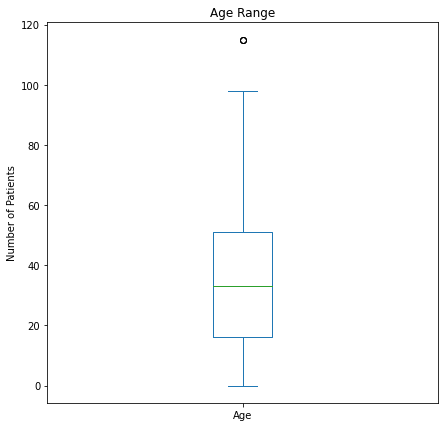

In [57]:
BoxAge = df_N["Age"].plot(kind="box",figsize=(7,7));
BoxAge.set_ylabel('Number of Patients');
BoxAge.set_title('Age Range');

___

> ### 6- The less 5 neighborhoods whose residents book for appointment: 

,Neighbourhood
count,110526
unique,81
top,JARDIM CAMBURI
freq,7717


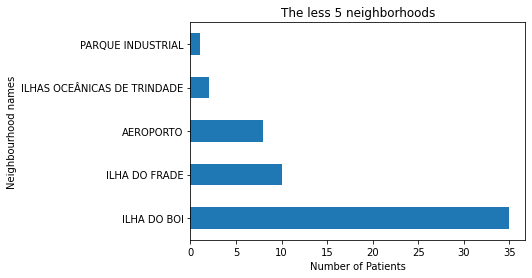

In [58]:
bar_Neigh = df.Neighbourhood.value_counts()[-5:].plot.barh();
bar_Neigh.set_xlabel('Number of Patients');
bar_Neigh.set_ylabel('Neighbourhood names');
bar_Neigh.set_title('The less 5 neighborhoods');
pd.DataFrame(df['Neighbourhood'].describe())

**1- FRADINHOS <br>
2- NAZARETH <br>
3- AEROPORTO <br>
4- ILHAS OCEÂNICAS DE TRINDADE <br>
5- PARQUE INDUSTRIAL <br>**

___